### Module 20 Challenge: Visualization for presentation

In [2]:
# Dependencies
import numpy as np
import pandas as pd
from pathlib import Path

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# add Matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
# read in clean data-set
file_path = Path('alcohol_ca_clean_final.csv')
df_final = pd.read_csv(file_path)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60210 entries, 0 to 60209
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     60210 non-null  int64  
 1   county_name                    60210 non-null  object 
 2   geotype                        60210 non-null  object 
 3   geoname                        60210 non-null  object 
 4   race_eth_updt                  60210 non-null  object 
 5   num_ppl_qrt_race               60210 non-null  int64  
 6   tot_ppl_region_race            60210 non-null  int64  
 7   tot_people_qrt                 60210 non-null  float64
 8   tot_people_region              60210 non-null  float64
 9   pct_ppl_qrt_race               60210 non-null  float64
 10  pct_all_qrt_race               60210 non-null  float64
 11  pct_all_ppl_qrt_race           60210 non-null  float64
 12  region_name                    60210 non-null 

### State Population breakdown by race: full population and population 1/4 miles within alcohol establishment

In [13]:
df_by_state = df[df.geotype == "CA"]
df_state_total = df_by_state[df_by_state.race_eth_name == "Total"]
df_by_state = df_by_state[df_by_state.race_eth_name != "Total"]
df_by_state

,Indicator_ID,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips_id,region_name,region_code,license_type,num_people_qrt,tot_people,pct_of_total
90315,774,Percent of Population within 1/4 Mile of Alcoh...,2014,1,AIAN,CA,6,California,NaN,0,NaN,NaN,Total_licenses,64394.0,162250.0,39.69
90316,774,Percent of Population within 1/4 Mile of Alcoh...,2014,3,AfricanAm,CA,6,California,NaN,0,NaN,NaN,Total_licenses,1197915.0,2163804.0,55.36
90317,774,Percent of Population within 1/4 Mile of Alcoh...,2014,2,Asian,CA,6,California,NaN,0,NaN,NaN,Total_licenses,2410073.0,4775070.0,50.47
90318,774,Percent of Population within 1/4 Mile of Alcoh...,2014,4,Latino,CA,6,California,NaN,0,NaN,NaN,Total_licenses,8100882.0,14013719.0,57.81
90319,774,Percent of Population within 1/4 Mile of Alcoh...,2014,7,Multiple,CA,6,California,NaN,0,NaN,NaN,Total_licenses,439097.0,968696.0,45.33
90320,774,Percent of Population within 1/4 Mile of Alcoh...,2014,5,NHOPI,CA,6,California,NaN,0,NaN,NaN,Total_licenses,65140.0,128577.0,50.66
90321,774,Percent of Population within 1/4 Mile of Alcoh...,2014,8,Other,CA,6,California,NaN,0,NaN,NaN,Total_licenses,42855.0,85587.0,50.07
90323,774,Percent of Population within 1/4 Mile of Alcoh...,2014,6,White,CA,6,California,NaN,0,NaN,NaN,Total_licenses,5917756.0,14956253.0,39.57


In [15]:
# Rebucket Races/ethnicities 
df_by_state['race_eth_updt'] = df_by_state['race_eth_name']
df_by_state.loc[(df_by_state['race_eth_name'] == 'AIAN') | (df_by_state['race_eth_name'] == 'NHOPI'), 'race_eth_updt'] = 'Other'  

df_by_state

,Indicator_ID,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips_id,region_name,region_code,license_type,num_people_qrt,tot_people,pct_of_total,race_eth_updt
90315,774,Percent of Population within 1/4 Mile of Alcoh...,2014,1,AIAN,CA,6,California,NaN,0,NaN,NaN,Total_licenses,64394.0,162250.0,39.69,Other
90316,774,Percent of Population within 1/4 Mile of Alcoh...,2014,3,AfricanAm,CA,6,California,NaN,0,NaN,NaN,Total_licenses,1197915.0,2163804.0,55.36,AfricanAm
90317,774,Percent of Population within 1/4 Mile of Alcoh...,2014,2,Asian,CA,6,California,NaN,0,NaN,NaN,Total_licenses,2410073.0,4775070.0,50.47,Asian
90318,774,Percent of Population within 1/4 Mile of Alcoh...,2014,4,Latino,CA,6,California,NaN,0,NaN,NaN,Total_licenses,8100882.0,14013719.0,57.81,Latino
90319,774,Percent of Population within 1/4 Mile of Alcoh...,2014,7,Multiple,CA,6,California,NaN,0,NaN,NaN,Total_licenses,439097.0,968696.0,45.33,Multiple
90320,774,Percent of Population within 1/4 Mile of Alcoh...,2014,5,NHOPI,CA,6,California,NaN,0,NaN,NaN,Total_licenses,65140.0,128577.0,50.66,Other
90321,774,Percent of Population within 1/4 Mile of Alcoh...,2014,8,Other,CA,6,California,NaN,0,NaN,NaN,Total_licenses,42855.0,85587.0,50.07,Other
90323,774,Percent of Population within 1/4 Mile of Alcoh...,2014,6,White,CA,6,California,NaN,0,NaN,NaN,Total_licenses,5917756.0,14956253.0,39.57,White


In [18]:
## summarize by race_eth_updt to group small populations
df_state_sum = df_by_state.groupby(['race_eth_updt']).agg({'num_people_qrt': 'sum'})
df_state_sum

,num_people_qrt
race_eth_updt,
AfricanAm,1197915.0
Asian,2410073.0
Latino,8100882.0
Multiple,439097.0
Other,172389.0
White,5917756.0


/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


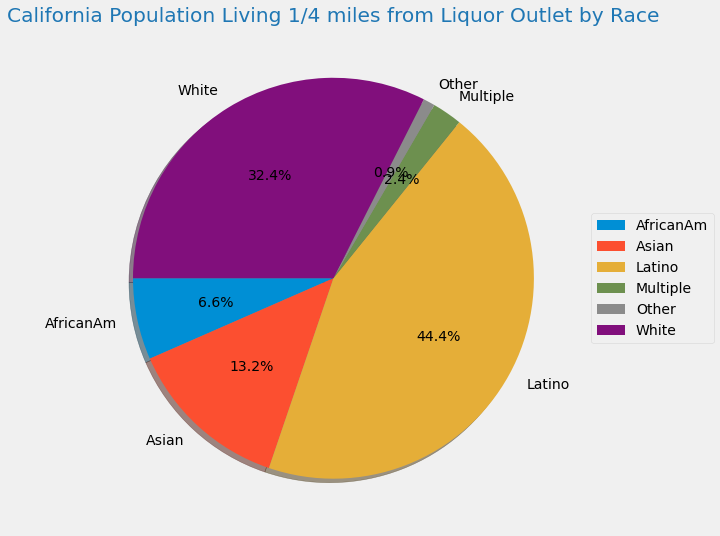

In [20]:
# Plot
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 16))
plt.pie(df_state_sum,
            labels=["AfricanAm", "Asian", "Latino", "Multiple", "Other", "White"],
            autopct='%1.1f%%', pctdistance= 0.6,
            shadow=True, startangle=180)
plt.title('California Population Living 1/4 miles from Liquor Outlet by Race', color = "Tab:blue")
#plt.legend(loc = 'best')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('state_qrt_race.png')
plt.show()


In [21]:
## overall state population by race 2014
df_state_sum2 = df_by_state.groupby(['race_eth_updt']).agg({'tot_people': 'sum'})
df_state_sum2

,tot_people
race_eth_updt,
AfricanAm,2163804.0
Asian,4775070.0
Latino,14013719.0
Multiple,968696.0
Other,376414.0
White,14956253.0


/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


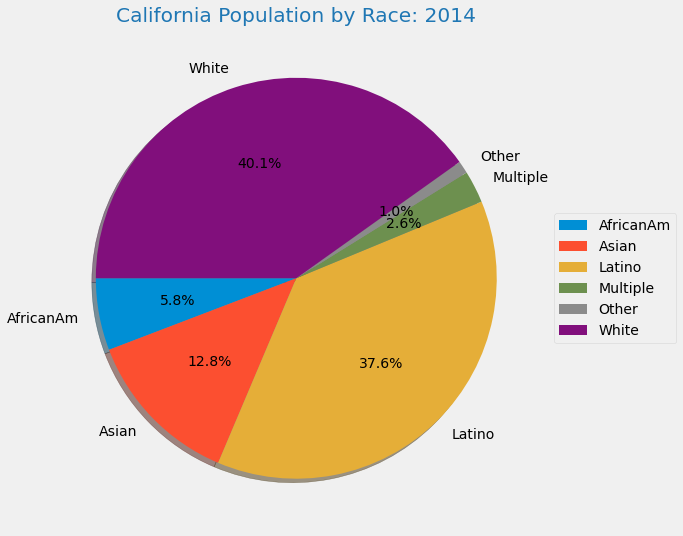

In [24]:
# Plot
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 16))
plt.pie(df_state_sum2,
            labels=["AfricanAm", "Asian", "Latino", "Multiple", "Other", "White"],
            autopct='%1.1f%%', pctdistance= 0.6,
            shadow=True, startangle=180)
plt.title('California Population by Race: 2014', color = "Tab:blue")
#plt.legend(loc = 'best')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('state_race.png')
plt.show()


### Region Population Breakdown by race: total population vs population 1/4 miles from liquor establishment

In [62]:
df_by_region = df[df.geotype == "RE"]
#df_region_total = df_by_region[df_by_region.race_eth_name == "Total"]
#df_by_region = df_by_region[df_by_region.race_eth_name != "Total"]
#df_by_region

In [63]:
# Rebucket Races/ethnicities 
df_by_region['race_eth_updt'] = df_by_region['race_eth_name']
df_by_region.loc[(df_by_region['race_eth_name'] == 'AIAN') | (df_by_region['race_eth_name'] == 'NHOPI'), 'race_eth_updt'] = 'Other'  

df_by_region

/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Indicator_ID,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips_id,region_name,region_code,license_type,num_people_qrt,tot_people,pct_of_total,race_eth_updt
90324,774,Percent of Population within 1/4 Mile of Alcoh...,2014,1,AIAN,RE,1,Bay Area,NaN,0,Bay Area,1.0,Total_licenses,11644.0,20691.0,56.28,Other
90325,774,Percent of Population within 1/4 Mile of Alcoh...,2014,3,AfricanAm,RE,1,Bay Area,NaN,0,Bay Area,1.0,Total_licenses,290643.0,460178.0,63.16,AfricanAm
90326,774,Percent of Population within 1/4 Mile of Alcoh...,2014,2,Asian,RE,1,Bay Area,NaN,0,Bay Area,1.0,Total_licenses,901884.0,1645872.0,54.80,Asian
90327,774,Percent of Population within 1/4 Mile of Alcoh...,2014,4,Latino,RE,1,Bay Area,NaN,0,Bay Area,1.0,Total_licenses,1035942.0,1681800.0,61.60,Latino
90328,774,Percent of Population within 1/4 Mile of Alcoh...,2014,7,Multiple,RE,1,Bay Area,NaN,0,Bay Area,1.0,Total_licenses,129138.0,248268.0,52.02,Multiple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90445,774,Percent of Population within 1/4 Mile of Alcoh...,2014,7,Multiple,RE,14,Southern California,NaN,0,Southern California,14.0,Total_licenses,181987.0,378200.0,48.12,Multiple
90446,774,Percent of Population within 1/4 Mile of Alcoh...,2014,5,NHOPI,RE,14,Southern California,NaN,0,Southern California,14.0,Total_licenses,25455.0,43955.0,57.91,Other
90447,774,Percent of Population within 1/4 Mile of Alcoh...,2014,8,Other,RE,14,Southern California,NaN,0,Southern California,14.0,Total_licenses,22985.0,40257.0,57.10,Other
90448,774,Percent of Population within 1/4 Mile of Alcoh...,2014,9,Total,RE,14,Southern California,NaN,0,Southern California,14.0,Total_licenses,9744365.0,18051534.0,53.98,Total


In [65]:
## summarize by race_eth_updt to group small populations
df_region_sum = df_by_region.groupby(['geoname', "race_eth_updt"]).agg({'num_people_qrt': 'sum'})
df_region_sum
                                                                       

num_people_qrt
geoname             race_eth_updt                
Bay Area            AfricanAm            290643.0
                    Asian                901884.0
                    Latino              1035942.0
                    Multiple             129138.0
                    Other                 45946.0
...                                           ...
Southern California Latino              5082016.0
                    Multiple             181987.0
                    Other                 70773.0
                    Total               9744365.0
                    White               2552634.0

[98 rows x 1 columns]

In [77]:
# reset index to column
df_region_sum2 = df_region_sum.reset_index(level=['race_eth_updt', 'geoname'])
df_region_sum2

,geoname,race_eth_updt,num_people_qrt
0,Bay Area,AfricanAm,290643.0
1,Bay Area,Asian,901884.0
2,Bay Area,Latino,1035942.0
3,Bay Area,Multiple,129138.0
4,Bay Area,Other,45946.0
...,...,...,...
93,Southern California,Latino,5082016.0
94,Southern California,Multiple,181987.0
95,Southern California,Other,70773.0
96,Southern California,Total,9744365.0


In [79]:
df_region_tot = df_region_sum2[df_region_sum2.race_eth_updt == "Total"]
df_region_tot.rename(columns={df_region_tot.columns[2]:'tot_people_qrt'}, inplace=True)
df_region_tot

/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,geoname,race_eth_updt,tot_people_qrt
5,Bay Area,Total,3869848.0
12,Butte,Total,75339.0
19,Central/Southeast Sierra,Total,33311.0
26,Monterey Bay,Total,329190.0
33,North Coast,Total,103579.0
40,Northeast Sierra,Total,38484.0
47,Northern Sacramento Valley,Total,32424.0
54,Sacramento Area,Total,780799.0
61,San Diego,Total,1341685.0
68,San Joaquin Valley,Total,1555205.0


In [80]:
df_region_sum2 = df_region_sum2[df_region_sum2.race_eth_updt != "Total"]
df_region_sum2

,geoname,race_eth_updt,num_people_qrt
0,Bay Area,AfricanAm,290643.0
1,Bay Area,Asian,901884.0
2,Bay Area,Latino,1035942.0
3,Bay Area,Multiple,129138.0
4,Bay Area,Other,45946.0
...,...,...,...
92,Southern California,Asian,1176999.0
93,Southern California,Latino,5082016.0
94,Southern California,Multiple,181987.0
95,Southern California,Other,70773.0


In [88]:
#df_region_pct = pd.merge(df_region_sum2[['geoname', 'raceth_updt'
#                 df_region_tot[['geoname','race_eth_updt', 'num_people_qrt', 'tot_people_qrt']],
#                 on='geoname')

df_region_pct = pd.merge(df_region_sum2, df_region_tot, on=['geoname'], how="left")
df_region_pct

,geoname,race_eth_updt_x,num_people_qrt,race_eth_updt_y,tot_people_qrt
0,Bay Area,AfricanAm,290643.0,Total,3869848.0
1,Bay Area,Asian,901884.0,Total,3869848.0
2,Bay Area,Latino,1035942.0,Total,3869848.0
3,Bay Area,Multiple,129138.0,Total,3869848.0
4,Bay Area,Other,45946.0,Total,3869848.0
...,...,...,...,...,...
79,Southern California,Asian,1176999.0,Total,9744365.0
80,Southern California,Latino,5082016.0,Total,9744365.0
81,Southern California,Multiple,181987.0,Total,9744365.0
82,Southern California,Other,70773.0,Total,9744365.0


In [92]:
# create new % of total people in region
df_region_pct['pct_tot_region_race'] = df_region_pct['num_people_qrt'] / df_region_pct['tot_people_qrt']
df_region_pct = df_region_pct[['geoname', 'race_eth_updt_x', 'pct_tot_region_race']]
df_region_pct


,geoname,race_eth_updt_x,pct_tot_region_race
0,Bay Area,AfricanAm,0.075105
1,Bay Area,Asian,0.233054
2,Bay Area,Latino,0.267696
3,Bay Area,Multiple,0.033370
4,Bay Area,Other,0.011873
...,...,...,...
79,Southern California,Asian,0.120788
80,Southern California,Latino,0.521534
81,Southern California,Multiple,0.018676
82,Southern California,Other,0.007263


In [94]:
pvt_by_region = pd.pivot_table(df_region_pct, index = 'geoname', columns = 'race_eth_updt_x', values = 'pct_tot_region_race') 
pvt_by_region

race_eth_updt_x,AfricanAm,Asian,Latino,Multiple,Other,White
geoname,,,,,,
Bay Area,0.075105,0.233054,0.267696,0.033370,0.011873,0.378902
Butte,0.020760,0.047094,0.163010,0.038665,0.020879,0.709593
Central/Southeast Sierra,0.006755,0.012668,0.193239,0.026238,0.024196,0.736904
Monterey Bay,0.015745,0.044853,0.547000,0.022832,0.008560,0.361010
North Coast,0.013130,0.024155,0.197540,0.037315,0.038560,0.689300
Northeast Sierra,0.010108,0.013070,0.143046,0.034118,0.023516,0.776141
Northern Sacramento Valley,0.006785,0.017240,0.455249,0.020047,0.017148,0.483531
Sacramento Area,0.077766,0.101542,0.256544,0.040633,0.015926,0.507589
San Diego,0.056805,0.092818,0.395828,0.029445,0.010223,0.414881


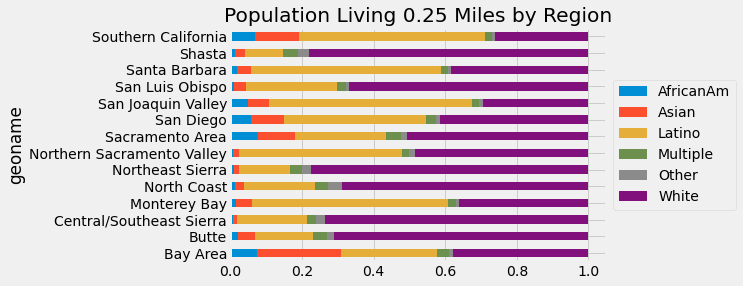

In [95]:
# Plot Racial/Ethnic Breakdown by Region: Bar Graph
pvt_by_region.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Population Living 0.25 Miles by Region by Race', 
    label = "County Name (CA)",
    mark_right = True) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Scatter Plots to demonstrate basic correlation between 

In [98]:
# read in clean data-set
file_path = Path('alcohol_ca_clean_final.csv')
df_final = pd.read_csv(file_path)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60210 entries, 0 to 60209
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     60210 non-null  int64  
 1   county_name                    60210 non-null  object 
 2   geotype                        60210 non-null  object 
 3   geoname                        60210 non-null  object 
 4   race_eth_updt                  60210 non-null  object 
 5   num_ppl_qrt_race               60210 non-null  int64  
 6   tot_ppl_region_race            60210 non-null  int64  
 7   tot_people_qrt                 60210 non-null  float64
 8   tot_people_region              60210 non-null  float64
 9   pct_ppl_qrt_race               60210 non-null  float64
 10  pct_all_qrt_race               60210 non-null  float64
 11  pct_all_ppl_qrt_race           60210 non-null  float64
 12  region_name                    60210 non-null 

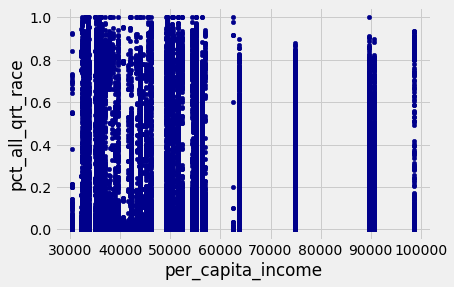

In [105]:

#df_scatter1 = df_final[['per_capita_income', 'pct_all_qrt_race']]
#ax1 = df_scatter1.plot.scatter(x='per_capita_income',
#                      y='pct_all_qrt_race',
#                      c='DarkBlue')

In [ ]:
y = df["pct_all_qrt_race"]
X = df.drop(columns="pct_all_qrt_race")

In [59]:
df_region_total= df_region_total[['geoname', 'race_eth_updt', 'num_people_qrt']]
df_region_total

KeyError: "['race_eth_updt'] not in index"

In [ ]:
df_region_pct = pd.merge(df_region_tot,
                 df_region_sum2[['geoname','race_eth_updt', 'people_qtr_sum']],
                 on='region_name')
df_county_pct

In [48]:
pct_by_region = pd.pivot_table(df_region_sum2, index = 'geoname', columns = 'race_eth_updt', values = 'num_people_qrt') 
pct_by_region

race_eth_updt,AfricanAm,Asian,Latino,Multiple,Other,White
geoname,,,,,,
Bay Area,290643.0,901884.0,1035942.0,129138.0,45946.0,1466295.0
Butte,1564.0,3548.0,12281.0,2913.0,1573.0,53460.0
Central/Southeast Sierra,225.0,422.0,6437.0,874.0,806.0,24547.0
Monterey Bay,5183.0,14765.0,180067.0,7516.0,2818.0,118841.0
North Coast,1360.0,2502.0,20461.0,3865.0,3994.0,71397.0
Northeast Sierra,389.0,503.0,5505.0,1313.0,905.0,29869.0
Northern Sacramento Valley,220.0,559.0,14761.0,650.0,556.0,15678.0
Sacramento Area,60720.0,79284.0,200309.0,31726.0,12435.0,396325.0
San Diego,76215.0,124533.0,531076.0,39506.0,13716.0,556639.0


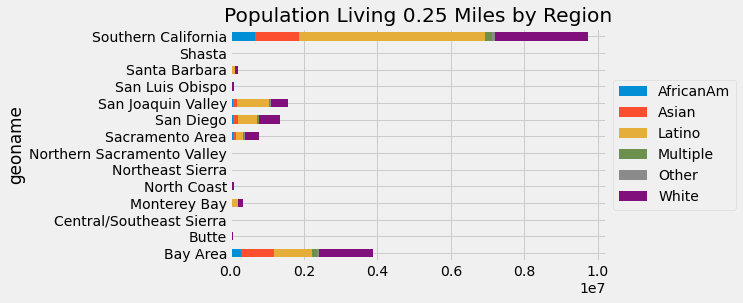

In [50]:
# Plot Racial/Ethnic Breakdown by County: Bar Graph
pct_by_region.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Population Living 0.25 Miles by Region', 
    label = "County Name (CA)",
    mark_right = True) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [55]:
# summarize by race_eth_updt to group small populations
df_region_sum3 = df_by_region.groupby(['geoname', "race_eth_updt"]).agg({'tot_people': 'sum'})

# reset index to column
df_region_sum3.reset_index(level=['geoname'])
                                                                        

,geoname,tot_people
race_eth_updt,,
AfricanAm,Bay Area,460178.0
Asian,Bay Area,1645872.0
Latino,Bay Area,1681800.0
Multiple,Bay Area,248268.0
Other,Bay Area,81718.0
...,...,...
Asian,Southern California,2164347.0
Latino,Southern California,8169102.0
Multiple,Southern California,378200.0


In [56]:
#pivot table for graph
pct_by_region2 = pd.pivot_table(df_region_sum3, index = 'geoname', columns = 'race_eth_updt', values = 'tot_people') 
pct_by_region2

race_eth_updt,AfricanAm,Asian,Latino,Multiple,Other,White
geoname,,,,,,
Bay Area,460178.0,1645872.0,1681800.0,248268.0,81718.0,3032903.0
Butte,3133.0,8921.0,31116.0,7300.0,4114.0,165416.0
Central/Southeast Sierra,2680.0,2083.0,24496.0,4739.0,5459.0,151751.0
Monterey Bay,13959.0,35733.0,345281.0,17534.0,6215.0,313986.0
North Coast,4135.0,5982.0,49856.0,11545.0,15831.0,242176.0
Northeast Sierra,3946.0,2198.0,22387.0,5926.0,5086.0,171949.0
Northern Sacramento Valley,709.0,1566.0,36249.0,2378.0,2258.0,69844.0
Sacramento Area,154259.0,268842.0,479036.0,91030.0,35265.0,1287587.0
San Diego,146600.0,328058.0,991348.0,94943.0,34317.0,1500047.0


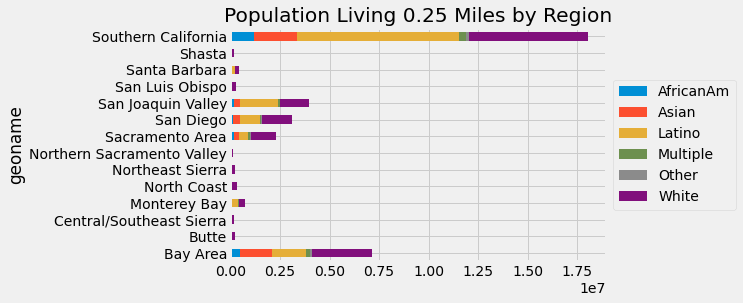

In [58]:
# Plot Racial/Ethnic Breakdown by County: Bar Graph
pct_by_region2.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Population Living 0.25 Miles by Region', 
    label = "County Name (CA)",
    mark_right = True) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [237]:
grouped_multiple.columns = ['people_qtr_sum']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

,geotype,race_eth_updt,people_qtr_sum
0,CA,AfricanAm,1197915.0
1,CA,Asian,2410073.0
2,CA,Latino,8100882.0
3,CA,Multiple,439097.0
4,CA,Other,172389.0
5,CA,White,5917756.0


In [238]:
# Pull out the totals and merge with rest of file
df_state_tot = df_1[df_1.race_eth_code == 9]
df_state_tot = df_state_tot[df_state_tot.geotype == 'CA']
df_state_tot = df_state_tot[['geotype', 'num_people_qrt']] 
df_state_tot.rename(columns={df_state_tot.columns[1]:'tot_people'}, inplace=True)
df_state_tot

,geotype,tot_people
90322,CA,18238112.0


In [243]:
# Pick up total population to recaluclate % of total
df_state_pct = pd.merge(df_state_tot,
                 grouped_multiple[['geotype','race_eth_updt', 'people_qtr_sum']],
                 on='geotype')
df_state_pct


,geotype,tot_people,race_eth_updt,people_qtr_sum
0,CA,18238112.0,AfricanAm,1197915.0
1,CA,18238112.0,Asian,2410073.0
2,CA,18238112.0,Latino,8100882.0
3,CA,18238112.0,Multiple,439097.0
4,CA,18238112.0,Other,172389.0
5,CA,18238112.0,White,5917756.0


In [244]:
# Calculate new pct_total
df_state_pct['pct_total'] = df_state_pct['people_qtr_sum'] / df_state_pct['tot_people']
df_state_pct

,geotype,tot_people,race_eth_updt,people_qtr_sum,pct_total
0,CA,18238112.0,AfricanAm,1197915.0,0.065682
1,CA,18238112.0,Asian,2410073.0,0.132145
2,CA,18238112.0,Latino,8100882.0,0.444173
3,CA,18238112.0,Multiple,439097.0,0.024076
4,CA,18238112.0,Other,172389.0,0.009452
5,CA,18238112.0,White,5917756.0,0.324472


In [245]:
df_state_pct = df_state_pct[['race_eth_updt', 'pct_total']] 
df_state_pct.set_index('race_eth_updt', inplace=True)
df_state_pct

,pct_total
race_eth_updt,
AfricanAm,0.065682
Asian,0.132145
Latino,0.444173
Multiple,0.024076
Other,0.009452
White,0.324472


In [246]:
df_trans = df_state_pct.transpose()
df_trans

race_eth_updt,AfricanAm,Asian,Latino,Multiple,Other,White
pct_total,0.065682,0.132145,0.444173,0.024076,0.009452,0.324472


/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


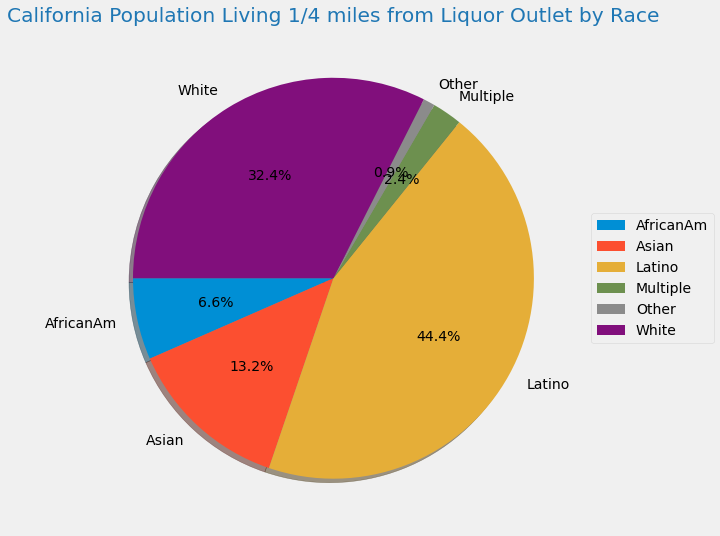

In [255]:
# Plot
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 16))
plt.pie(df_trans,
            labels=["AfricanAm", "Asian", "Latino", "Multiple", "Other", "White"],
            autopct='%1.1f%%', pctdistance= 0.6,
            shadow=True, startangle=180)
plt.title('California Population Living 1/4 miles from Liquor Outlet by Race', color = "Tab:blue")
#plt.legend(loc = 'best')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('Resources/dec_wtype.png')
plt.show()


### Population within 1/4 mile of liquor Racial/Ethnic Break down by County

In [58]:
#Pull our only county level information
df_county = df_1[df_1.geotype == 'RE']
df_county = df_county[df_county.race_eth_code != 9]
df_county

,race_eth_code,race_eth_name,geotype,geoname,region_name,num_people_qrt,tot_people,pct_of_total,race_eth_updt
90324,1,AIAN,RE,Bay Area,Bay Area,11644.0,20691.0,56.28,Other
90325,3,AfricanAm,RE,Bay Area,Bay Area,290643.0,460178.0,63.16,AfricanAm
90326,2,Asian,RE,Bay Area,Bay Area,901884.0,1645872.0,54.80,Asian
90327,4,Latino,RE,Bay Area,Bay Area,1035942.0,1681800.0,61.60,Latino
90328,7,Multiple,RE,Bay Area,Bay Area,129138.0,248268.0,52.02,Multiple
...,...,...,...,...,...,...,...,...,...
90444,4,Latino,RE,Southern California,Southern California,5082016.0,8169102.0,62.21,Latino
90445,7,Multiple,RE,Southern California,Southern California,181987.0,378200.0,48.12,Multiple
90446,5,NHOPI,RE,Southern California,Southern California,25455.0,43955.0,57.91,Other
90447,8,Other,RE,Southern California,Southern California,22985.0,40257.0,57.10,Other


In [262]:
## summarize by race_eth_updt to group small populations
grouped_multiple2 = df_county.groupby(['region_name','race_eth_updt']).agg({'num_people_qrt': ['sum']})
grouped_multiple2.columns = ['people_qtr_sum']
grouped_multiple2 = grouped_multiple2.reset_index()
grouped_multiple2

,region_name,race_eth_updt,people_qtr_sum
0,Bay Area,AfricanAm,290643.0
1,Bay Area,Asian,901884.0
2,Bay Area,Latino,1035942.0
3,Bay Area,Multiple,129138.0
4,Bay Area,Other,45946.0
...,...,...,...
79,Southern California,Asian,1176999.0
80,Southern California,Latino,5082016.0
81,Southern California,Multiple,181987.0
82,Southern California,Other,70773.0


In [266]:
#Pull out total populuation in 1/4 mile
df_county_tot = df_1[df_1.race_eth_code == 9]
df_county_tot = df_county_tot[df_county_tot.geotype == 'RE']
df_county_tot = df_county_tot[['region_name', 'num_people_qrt']] 
df_county_tot.rename(columns={df_county_tot.columns[1]:'tot_people'}, inplace=True)
df_county_tot


,region_name,tot_people
90331,Bay Area,3869848.0
90340,Butte,75339.0
90349,Central/Southeast Sierra,33311.0
90358,Monterey Bay,329190.0
90367,North Coast,103579.0
90376,Northeast Sierra,38484.0
90385,Northern Sacramento Valley,32424.0
90394,Sacramento Area,780799.0
90403,San Diego,1341685.0
90412,San Joaquin Valley,1555205.0


In [267]:
# Pick up total population to recaluclate % of total
df_county_pct = pd.merge(df_county_tot,
                 grouped_multiple2[['region_name','race_eth_updt', 'people_qtr_sum']],
                 on='region_name')
df_county_pct


,region_name,tot_people,race_eth_updt,people_qtr_sum
0,Bay Area,3869848.0,AfricanAm,290643.0
1,Bay Area,3869848.0,Asian,901884.0
2,Bay Area,3869848.0,Latino,1035942.0
3,Bay Area,3869848.0,Multiple,129138.0
4,Bay Area,3869848.0,Other,45946.0
...,...,...,...,...
79,Southern California,9744365.0,Asian,1176999.0
80,Southern California,9744365.0,Latino,5082016.0
81,Southern California,9744365.0,Multiple,181987.0
82,Southern California,9744365.0,Other,70773.0


In [269]:
# Calculate new pct_total
df_county_pct['pct_total'] = df_county_pct['people_qtr_sum'] / df_county_pct['tot_people']
df_county_pct

,region_name,tot_people,race_eth_updt,people_qtr_sum,pct_total
0,Bay Area,3869848.0,AfricanAm,290643.0,0.075105
1,Bay Area,3869848.0,Asian,901884.0,0.233054
2,Bay Area,3869848.0,Latino,1035942.0,0.267696
3,Bay Area,3869848.0,Multiple,129138.0,0.033370
4,Bay Area,3869848.0,Other,45946.0,0.011873
...,...,...,...,...,...
79,Southern California,9744365.0,Asian,1176999.0,0.120788
80,Southern California,9744365.0,Latino,5082016.0,0.521534
81,Southern California,9744365.0,Multiple,181987.0,0.018676
82,Southern California,9744365.0,Other,70773.0,0.007263


In [270]:
pct_by_county = pd.pivot_table(df_county_pct, index = 'region_name', columns = 'race_eth_updt', values = 'pct_total') 
print(pct_by_county)



race_eth_updt               AfricanAm     Asian    Latino  Multiple     Other  \
region_name                                                                     
Bay Area                     0.075105  0.233054  0.267696  0.033370  0.011873   
Butte                        0.020760  0.047094  0.163010  0.038665  0.020879   
Central/Southeast Sierra     0.006755  0.012668  0.193239  0.026238  0.024196   
Monterey Bay                 0.015745  0.044853  0.547000  0.022832  0.008560   
North Coast                  0.013130  0.024155  0.197540  0.037315  0.038560   
Northeast Sierra             0.010108  0.013070  0.143046  0.034118  0.023516   
Northern Sacramento Valley   0.006785  0.017240  0.455249  0.020047  0.017148   
Sacramento Area              0.077766  0.101542  0.256544  0.040633  0.015926   
San Diego                    0.056805  0.092818  0.395828  0.029445  0.010223   
San Joaquin Valley           0.049217  0.059750  0.565539  0.020521  0.009950   
San Luis Obispo             

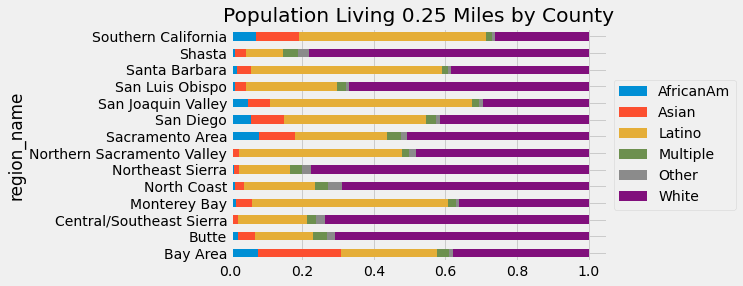

In [276]:
# Plot Racial/Ethnic Breakdown by County: Bar Graph
pct_by_county.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Population Living 0.25 Miles by County', 
    label = "County Name (CA)",
    mark_right = True) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [38]:
df_state

,race_eth_code,race_eth_name,geotype,geoname,region_name,num_people_qrt,tot_people,pct_of_total,race_eth_updt
90315,1,AIAN,CA,California,NaN,64394.0,162250.0,39.69,Other
90316,3,AfricanAm,CA,California,NaN,1197915.0,2163804.0,55.36,AfricanAm
90317,2,Asian,CA,California,NaN,2410073.0,4775070.0,50.47,Asian
90318,4,Latino,CA,California,NaN,8100882.0,14013719.0,57.81,Latino
90319,7,Multiple,CA,California,NaN,439097.0,968696.0,45.33,Multiple
90320,5,NHOPI,CA,California,NaN,65140.0,128577.0,50.66,Other
90321,8,Other,CA,California,NaN,42855.0,85587.0,50.07,Other
90323,6,White,CA,California,NaN,5917756.0,14956253.0,39.57,White


## Total Population Breakdown at State

In [52]:
## summarize by race_eth_updt to group small populations
grouped_multiple5 = df_state.groupby(['race_eth_updt']).agg({'tot_people': ['sum']})
grouped_multiple5.columns = ['tot_people_sum']
grouped_multiple5.reset_index()

grouped_multiple5

,tot_people_sum
race_eth_updt,
AfricanAm,2163804.0
Asian,4775070.0
Latino,14013719.0
Multiple,968696.0
Other,376414.0
White,14956253.0


In [53]:
df_trans_all = grouped_multiple5.transpose()
df_trans_all

race_eth_updt,AfricanAm,Asian,Latino,Multiple,Other,White
tot_people_sum,2163804.0,4775070.0,14013719.0,968696.0,376414.0,14956253.0


/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


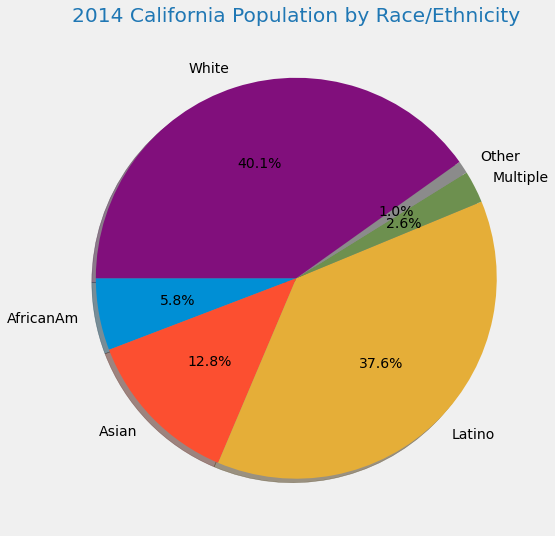

In [55]:
# Plot
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(8, 16))
plt.pie(df_trans_all,
            labels=["AfricanAm", "Asian", "Latino", "Multiple", "Other", "White"],
            autopct='%1.1f%%', pctdistance= 0.6,
            shadow=True, startangle=180)
plt.title('2014 California Population by Race/Ethnicity', color = "Tab:blue")
#plt.legend(loc = 'best')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('Resources/dec_wtype.png')
plt.show()

#print(dec_wtype)

In [60]:
### Population breakdown by region
df_county

,race_eth_code,race_eth_name,geotype,geoname,region_name,num_people_qrt,tot_people,pct_of_total,race_eth_updt
90324,1,AIAN,RE,Bay Area,Bay Area,11644.0,20691.0,56.28,Other
90325,3,AfricanAm,RE,Bay Area,Bay Area,290643.0,460178.0,63.16,AfricanAm
90326,2,Asian,RE,Bay Area,Bay Area,901884.0,1645872.0,54.80,Asian
90327,4,Latino,RE,Bay Area,Bay Area,1035942.0,1681800.0,61.60,Latino
90328,7,Multiple,RE,Bay Area,Bay Area,129138.0,248268.0,52.02,Multiple
...,...,...,...,...,...,...,...,...,...
90444,4,Latino,RE,Southern California,Southern California,5082016.0,8169102.0,62.21,Latino
90445,7,Multiple,RE,Southern California,Southern California,181987.0,378200.0,48.12,Multiple
90446,5,NHOPI,RE,Southern California,Southern California,25455.0,43955.0,57.91,Other
90447,8,Other,RE,Southern California,Southern California,22985.0,40257.0,57.10,Other


In [62]:
## summarize by race_eth_updt to group small populations
grouped_multiple4 = df_county.groupby(['region_name','race_eth_updt']).agg({'tot_people': ['sum']})
grouped_multiple4.columns = ['people_tot_sum']
grouped_multiple4 = grouped_multiple4.reset_index()
grouped_multiple4

,region_name,race_eth_updt,people_tot_sum
0,Bay Area,AfricanAm,460178.0
1,Bay Area,Asian,1645872.0
2,Bay Area,Latino,1681800.0
3,Bay Area,Multiple,248268.0
4,Bay Area,Other,81718.0
...,...,...,...
79,Southern California,Asian,2164347.0
80,Southern California,Latino,8169102.0
81,Southern California,Multiple,378200.0
82,Southern California,Other,132799.0


In [65]:
# Calculate % of all living in region
# Calculate new pct_total
df_county_pct2 = ['pct_all'] = df_county_pct['people_tot_sum'] / df_county_pct['people_tot_sum']
df_county_pct2

NameError: name 'df_county_pct' is not defined

In [63]:
break_by_county = pd.pivot_table(grouped_multiple4, index = 'region_name', columns = 'race_eth_updt', values = 'people_tot_sum') 
print(break_by_county)

race_eth_updt               AfricanAm      Asian     Latino  Multiple  \
region_name                                                             
Bay Area                     460178.0  1645872.0  1681800.0  248268.0   
Butte                          3133.0     8921.0    31116.0    7300.0   
Central/Southeast Sierra       2680.0     2083.0    24496.0    4739.0   
Monterey Bay                  13959.0    35733.0   345281.0   17534.0   
North Coast                    4135.0     5982.0    49856.0   11545.0   
Northeast Sierra               3946.0     2198.0    22387.0    5926.0   
Northern Sacramento Valley      709.0     1566.0    36249.0    2378.0   
Sacramento Area              154259.0   268842.0   479036.0   91030.0   
San Diego                    146600.0   328058.0   991348.0   94943.0   
San Joaquin Valley           181592.0   279474.0  1930510.0   85696.0   
San Luis Obispo                5128.0     8106.0    55973.0    6237.0   
Santa Barbara                  7242.0    19591.0   

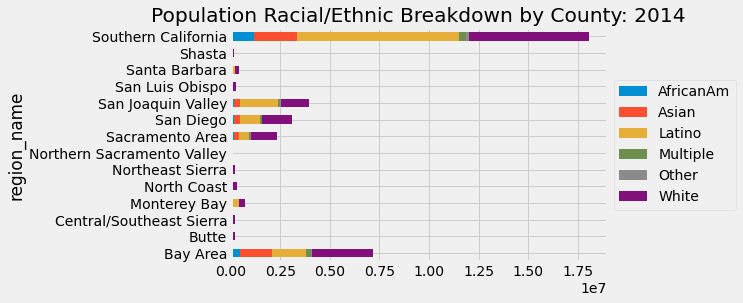

In [64]:
# Plot Racial/Ethnic Breakdown by County: Bar Graph
break_by_county.plot( 
    kind = 'barh', 
    stacked = True, 
    title = 'Population Racial/Ethnic Breakdown by County: 2014', 
    label = "County Name (CA)",
    mark_right = True) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Which races have the highest percentage of their population close to alcohol establishments?

In [48]:
df_state2 = df_state
df_state2['pct_of_tot'] = df_state2['pct_of_total']/100
df_state_pct2 = df_state2[['race_eth_name', 'num_people_qrt', 'tot_people', 'pct_of_total', 'pct_of_tot']]
df_state_pct2

,race_eth_name,num_people_qrt,tot_people,pct_of_total,pct_of_tot
90315,AIAN,64394.0,162250.0,39.69,0.3969
90316,AfricanAm,1197915.0,2163804.0,55.36,0.5536
90317,Asian,2410073.0,4775070.0,50.47,0.5047
90318,Latino,8100882.0,14013719.0,57.81,0.5781
90319,Multiple,439097.0,968696.0,45.33,0.4533
90320,NHOPI,65140.0,128577.0,50.66,0.5066
90321,Other,42855.0,85587.0,50.07,0.5007
90323,White,5917756.0,14956253.0,39.57,0.3957


In [53]:
df_state_pct3 = df_state_pct2.set_index('race_eth_name')
df_state_pct3['people_not_qrt'] = df_state_pct3['tot_people'] - df_state_pct3['num_people_qrt']
df_state_pct4 = df_state_pct3.drop(['pct_of_total', 'pct_of_tot', 'tot_people'], axis=1)
df_state_pct4

,num_people_qrt,people_not_qrt
race_eth_name,,
AIAN,64394.0,97856.0
AfricanAm,1197915.0,965889.0
Asian,2410073.0,2364997.0
Latino,8100882.0,5912837.0
Multiple,439097.0,529599.0
NHOPI,65140.0,63437.0
Other,42855.0,42732.0
White,5917756.0,9038497.0


/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'num_people_qrt' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/Users/maggiemcphail/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'people_not_qrt' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


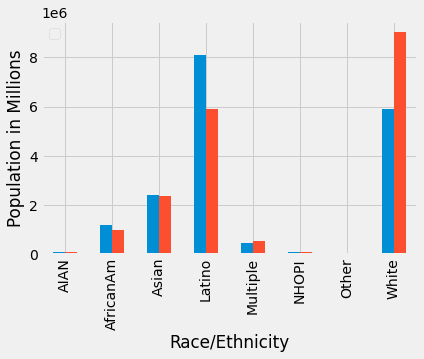

In [79]:
plt.style.use('fivethirtyeight')
df_state_pct4.plot( 
    kind = 'bar', 
    stacked = False, 
    title = '', 
    mark_right = True) 
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Population in Millions')
plt.xlabel('Race/Ethnicity')
plt.legend(['num_people_qrt', 'people_not_qrt'],['Population within 1/4 Mile', 'Population outside 1/4 Mile'])


### Extra code

In [ ]:
# Racial/Ethnic Breakdown by State: CA
df_state = df_1[df_1.geotype == 'CA']
df_state = df_state[df_state.race_eth_code != 9]
df_state